In [4]:
import pandas as pd
import numpy as np

#pd.options.plotting.backend = "matplotlib"
# pd.options.plotting.backend = "plotly"

from scipy.fft import fft, fftfreq, ifft, fft2, ifft2, ifftshift
from scipy.signal import blackman
import matplotlib.pyplot as plt
import matplotlib

from scipy.fftpack import fft, fftshift
from scipy.signal import butter
from scipy import signal
from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration
from scipy.ndimage import gaussian_filter as gf

from xrdc import featurization as feat
from xrdc import fourier

from importlib import reload
from xrdc import source_separation as sep
reload(sep)

<module 'xrdc.source_separation' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/source_separation.py'>

In [5]:
df = pd.read_csv("YijinXRD.dat", sep = '\t')
qq = df.iloc[:, 0]

patterns = df.iloc[:, 2:]
patterns = (patterns.values.T)[:, 1:]

for i in range(len(patterns)):
    patterns[i] = patterns[i] - i * 1000
    
#patterns = np.vstack((patterns[0][None, :], patterns))

In [11]:
cutoff = .25

In [12]:
slow_q, fast_q, slow_T, fast_T = sep.separate_signal(patterns, cutoff = cutoff,  threshold = 50, smooth_q = 1.7)

In [24]:
bgmask = sep.get_bgmask(patterns, 50, cutoff = cutoff)
# plt.imshow(bgmask, cmap = 'jet')

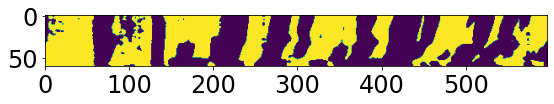

In [25]:
plt.imshow(bgmask)

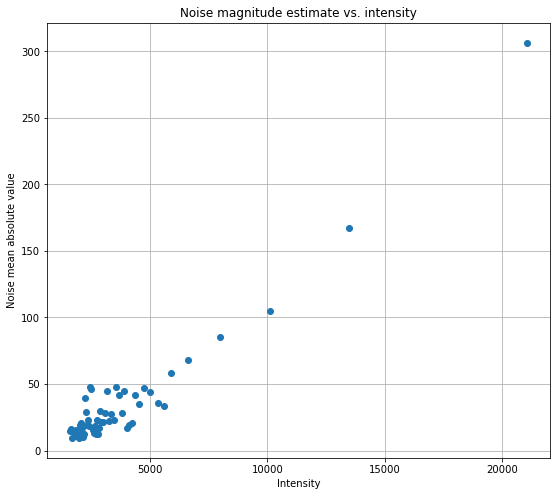

In [21]:
%matplotlib inline

nsplit = 60
fast_T_trunc = fast_T[:, 50: -50]
intensities = (patterns * bgmask)[:, 50: -50].ravel()

# intensities = patterns[:20, 50:400].ravel()
# intensities = slow_T.T[:20, 50:400].ravel()
# intensities = slow_T.T.ravel()

# absolute deviation
noise = np.abs(fast_T_trunc.ravel())
# noise = fast_T.T[:20, 50:400].ravel()
# noise = fast_T.T.ravel()

sorter = np.argsort(intensities)

splitsort = np.split(sorter, nsplit)
splitintensity = np.array([(intensities[idxs]).ravel().mean() for idxs in splitsort])

# mean absolute values of the high-T noise
splitmean = np.array([(noise[idxs]).mean() for idxs in splitsort])
split_noise_abs_std = np.array([(noise[idxs]).std() for idxs in splitsort])

splitstd = np.array([(fast_T_trunc.ravel())[idxs].std() for idxs in splitsort])

# logsplitintensity, logsplitstd = np.log10(splitintensity), np.log10(splitstd)

plt.rcParams["figure.figsize"]=(9, 8)
#plt.plot(splitintensity, splitmean, 'o')

plt.plot(splitintensity[splitintensity > 0][1:], splitmean[splitintensity > 0][1:], 'o')
#plt.plot(splitintensity[splitintensity > 0][1:], split_noise_abs_std[splitintensity > 0][1:], 'o')

# plt.xlim(1000, None)
# # plt.ylim(1, None)
# #plt.plot(splitstd, 'o')
# # plt.semilogx()
# # plt.semilogy()
plt.xlabel('Intensity')
plt.ylabel('Noise mean absolute value')
plt.title("Noise magnitude estimate vs. intensity")
matplotlib.rcParams.update({'font.size': 24})

plt.grid()